In [308]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


dados = pd.read_csv("C:/Users/marce/ansel/Desktop/Customer-Churn-Records.csv")

"""" Processo de traduzir para maior facilidade"""


dadosPTBR = dados.rename(columns= {"RowNumber" : "numero_da_linha", "CustomerId" : "id", "Surname" : "sobrenome",
             "CreditScore" : "pontuacao_de_credito", "Geography" :  "local", "Gender" : "sexo", "Age" :
              "idade", "Tenure" : "anos_de_cliente_do_banco", "Balance" : "saldo", "NumOfProducts" :
              "produto_comprado_por_meio_do_banco", "HasCrCard" : "tem_cartao_de_cred", "IsActiveMember":
              "membro_ativo", "EstimatedSalary": "salario_estimado", "Exited": "deixou_o_banco", "Complain"
              :"tem_reclamacao", "Satisfaction Score": "nota_de_resolucao_reclamacao", "Card Type": 
              "tipo_cartao", "Point Earned": "pontos_ganhos_pelo_uso_cartao_cred"} )

dadosPTBR2 = dadosPTBR.replace(["France", "Germany", "Spain", "Female", "Male", "DIAMOND", "GOLD", "SILVER", "PLATINUM"], 
                  ["França", "Alemanha", "Espanha", "Feminino", "Masculino", "Diamante", "Ouro", "Prata", "Platina"])



In [309]:
# Antes:

dados.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0,0,2,SILVER,206
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,1,2,DIAMOND,282
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,0,3,GOLD,251
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,0,3,GOLD,342


In [310]:
# Depois:

print(dadosPTBR2.columns)

Index(['numero_da_linha', 'id', 'sobrenome', 'pontuacao_de_credito', 'local',
       'sexo', 'idade', 'anos_de_cliente_do_banco', 'saldo',
       'produto_comprado_por_meio_do_banco', 'tem_cartao_de_cred',
       'membro_ativo', 'salario_estimado', 'deixou_o_banco', 'tem_reclamacao',
       'nota_de_resolucao_reclamacao', 'tipo_cartao',
       'pontos_ganhos_pelo_uso_cartao_cred'],
      dtype='object')


In [311]:
# Verificando se há valores NaN ou duplicados

dadosPTBR2.isnull().sum()

numero_da_linha                       0
id                                    0
sobrenome                             0
pontuacao_de_credito                  0
local                                 0
sexo                                  0
idade                                 0
anos_de_cliente_do_banco              0
saldo                                 0
produto_comprado_por_meio_do_banco    0
tem_cartao_de_cred                    0
membro_ativo                          0
salario_estimado                      0
deixou_o_banco                        0
tem_reclamacao                        0
nota_de_resolucao_reclamacao          0
tipo_cartao                           0
pontos_ganhos_pelo_uso_cartao_cred    0
dtype: int64

In [312]:
duplicados = dadosPTBR2.duplicated().sum()
print(duplicados)

0


In [313]:
dadosPTBR2.drop(["sobrenome", "id", "numero_da_linha" ], axis= 1 , inplace= True)


dadosPTBR2.head(10)

,pontuacao_de_credito,local,sexo,idade,anos_de_cliente_do_banco,saldo,produto_comprado_por_meio_do_banco,tem_cartao_de_cred,membro_ativo,salario_estimado,deixou_o_banco,tem_reclamacao,nota_de_resolucao_reclamacao,tipo_cartao,pontos_ganhos_pelo_uso_cartao_cred
0,619,França,Feminino,42,2,0.00,1,1,1,101348.88,1,1,2,Diamante,464
1,608,Espanha,Feminino,41,1,83807.86,1,0,1,112542.58,0,1,3,Diamante,456
2,502,França,Feminino,42,8,159660.80,3,1,0,113931.57,1,1,3,Diamante,377
3,699,França,Feminino,39,1,0.00,2,0,0,93826.63,0,0,5,Ouro,350
4,850,Espanha,Feminino,43,2,125510.82,1,1,1,79084.10,0,0,5,Ouro,425
5,645,Espanha,Masculino,44,8,113755.78,2,1,0,149756.71,1,1,5,Diamante,484
6,822,França,Masculino,50,7,0.00,2,1,1,10062.80,0,0,2,Prata,206
7,376,Alemanha,Feminino,29,4,115046.74,4,1,0,119346.88,1,1,2,Diamante,282
8,501,França,Masculino,44,4,142051.07,2,0,1,74940.50,0,0,3,Ouro,251
9,684,França,Masculino,27,2,134603.88,1,1,1,71725.73,0,0,3,Ouro,342


In [314]:
""" Aqui temos um passo importante, pois quando temos um conjunto de dados com valores categóricos, estamos lidando com um tipo de dado qualitativo nominal.
Assim, temos que mudar para quantitativas.
Obs: Nesse conjunto de dados já tiveram algumas substituições por padrão, como na coluna 'tem_cartao_de_cred' e outras."""



dadosnum3 = pd.get_dummies(data = dadosPTBR2, drop_first= True)

dadosnum3 = dadosnum3.astype(int)

dadosnum3.head(10)

,pontuacao_de_credito,idade,anos_de_cliente_do_banco,saldo,produto_comprado_por_meio_do_banco,tem_cartao_de_cred,membro_ativo,salario_estimado,deixou_o_banco,tem_reclamacao,nota_de_resolucao_reclamacao,pontos_ganhos_pelo_uso_cartao_cred,local_Espanha,local_França,sexo_Masculino,tipo_cartao_Ouro,tipo_cartao_Platina,tipo_cartao_Prata
0,619,42,2,0,1,1,1,101348,1,1,2,464,0,1,0,0,0,0
1,608,41,1,83807,1,0,1,112542,0,1,3,456,1,0,0,0,0,0
2,502,42,8,159660,3,1,0,113931,1,1,3,377,0,1,0,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,5,350,0,1,0,1,0,0
4,850,43,2,125510,1,1,1,79084,0,0,5,425,1,0,0,1,0,0
5,645,44,8,113755,2,1,0,149756,1,1,5,484,1,0,1,0,0,0
6,822,50,7,0,2,1,1,10062,0,0,2,206,0,1,1,0,0,1
7,376,29,4,115046,4,1,0,119346,1,1,2,282,0,0,0,0,0,0
8,501,44,4,142051,2,0,1,74940,0,0,3,251,0,1,1,1,0,0
9,684,27,2,134603,1,1,1,71725,0,0,3,342,0,1,1,1,0,0


In [315]:
saldo0 = dadosnum3.loc[dadosnum3["saldo"]== 0]
saldo0 = saldo0.loc[saldo0["deixou_o_banco"]== 1]

saldo0["deixou_o_banco"].value_counts()

deixou_o_banco
1    500
Name: count, dtype: int64

In [316]:
saldo0 = dadosnum3.loc[dadosnum3["saldo"]== 0]
saldo0 = saldo0.loc[saldo0["deixou_o_banco"]== 0]

saldo0["deixou_o_banco"].value_counts()

deixou_o_banco
0    3117
Name: count, dtype: int64

In [317]:
dadosnum4 = dadosnum3.loc[dadosnum3["saldo"]>0] #Ignorando valores 0, pois há uma diferença enorme de informações.

dadosnum4.head()

,pontuacao_de_credito,idade,anos_de_cliente_do_banco,saldo,produto_comprado_por_meio_do_banco,tem_cartao_de_cred,membro_ativo,salario_estimado,deixou_o_banco,tem_reclamacao,nota_de_resolucao_reclamacao,pontos_ganhos_pelo_uso_cartao_cred,local_Espanha,local_França,sexo_Masculino,tipo_cartao_Ouro,tipo_cartao_Platina,tipo_cartao_Prata
1,608,41,1,83807,1,0,1,112542,0,1,3,456,1,0,0,0,0,0
2,502,42,8,159660,3,1,0,113931,1,1,3,377,0,1,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,5,425,1,0,0,1,0,0
5,645,44,8,113755,2,1,0,149756,1,1,5,484,1,0,1,0,0,0
7,376,29,4,115046,4,1,0,119346,1,1,2,282,0,0,0,0,0,0


<Axes: xlabel='pontos_ganhos_pelo_uso_cartao_cred'>

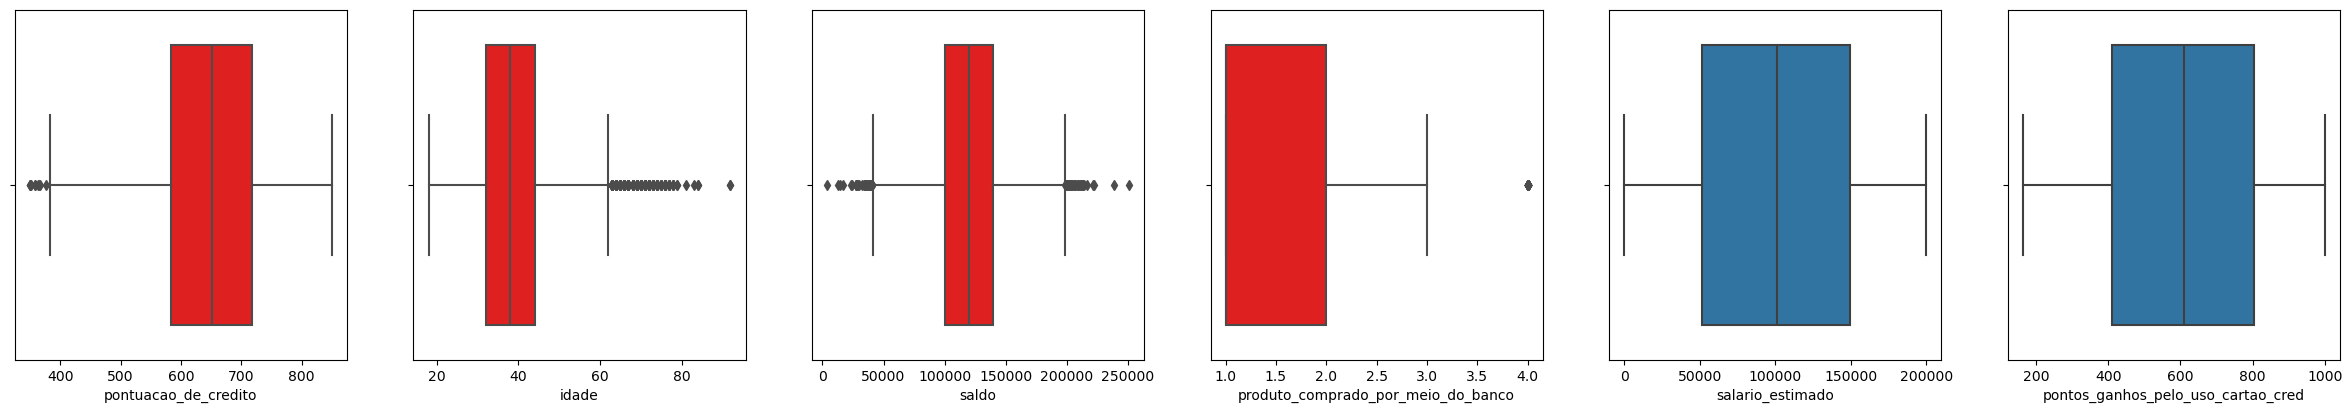

In [318]:
plt.figure(figsize= (30,10))

plt.subplot(2,6,1)
sns.boxplot(data= dadosnum4 , x= "pontuacao_de_credito", color= "Red")

plt.subplot(2,6,2)
sns.boxplot(data= dadosnum4 , x= "idade" , color= "Red")

plt.subplot(2,6,3)
sns.boxplot(data= dadosnum4 , x= "saldo" , color= "Red")

plt.subplot(2,6,4)
sns.boxplot(data= dadosnum4 , x= "produto_comprado_por_meio_do_banco" , color= "Red")

plt.subplot(2,6,5)
sns.boxplot(data= dadosnum4 , x= "salario_estimado")

plt.subplot(2,6,6)
sns.boxplot(data= dadosnum4 , x= "pontos_ganhos_pelo_uso_cartao_cred")

In [319]:
"""Temos que ter cuidado na remoção na parte de idade, pois pode ter informações importantes sobre como pessoas mais velhas tem
caracteristicas diferentes de outros. Por isso, tentarei pegar uma faixa de idade abaixo dos outliers para entender o comportamento da maioria."""

idade = dadosnum4.loc[dadosnum4["idade"]> 49]

idade['idade'].value_counts()

idade
50    93
51    89
52    67
54    58
55    57
53    54
56    52
58    49
57    43
59    43
60    38
61    37
62    35
63    30
64    24
67    22
66    17
69    16
68    14
71    13
72    13
70    12
74    12
65    12
76    10
73     8
77     5
75     5
78     4
84     2
79     2
92     2
81     1
83     1
Name: count, dtype: int64

<Axes: xlabel='pontos_ganhos_pelo_uso_cartao_cred'>

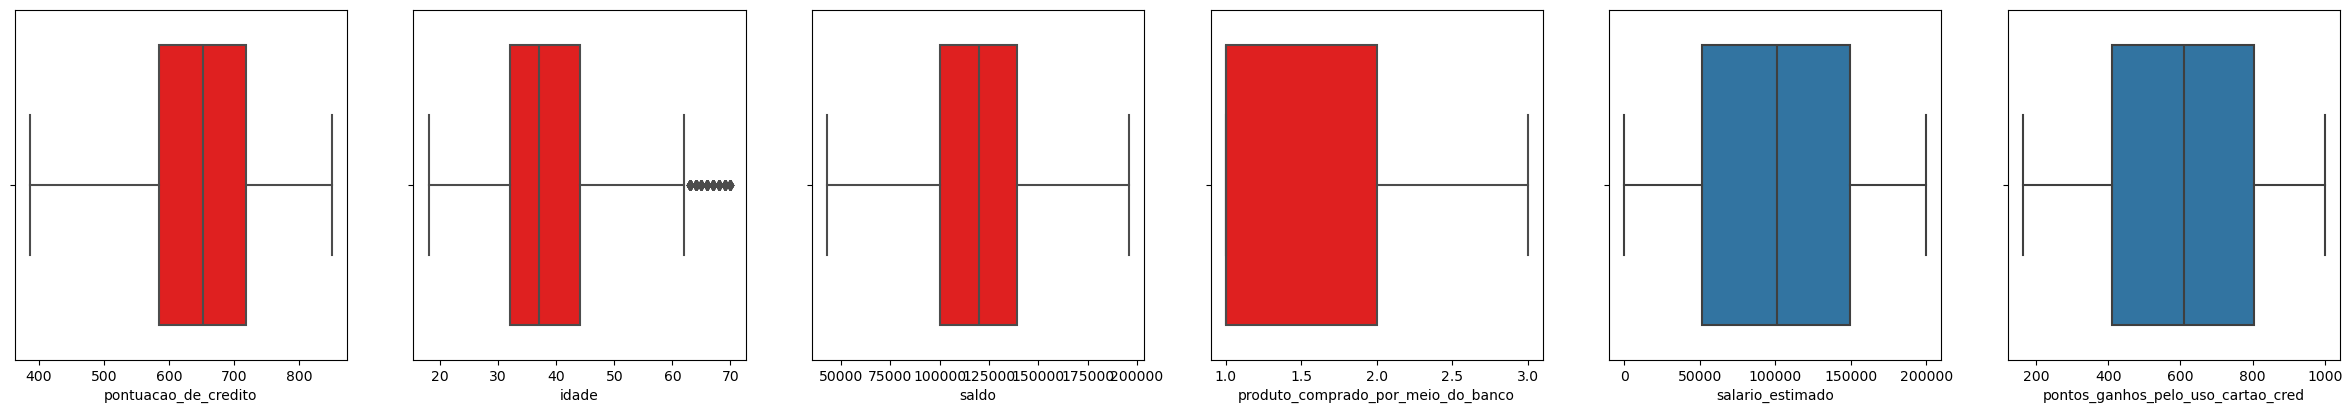

In [320]:
"""Removendo outliers"""

dados1 = dadosnum3.loc[dadosnum3["pontuacao_de_credito"]>=384]
dados2 =dados1.loc[dados1["idade"]<=70]
dados3 = dados2.loc[(dados2["saldo"]<=196000) & (dados2["saldo"]>43000)]
dadosnum5 = dados3.loc[dados3["produto_comprado_por_meio_do_banco"]<3.5]


plt.figure(figsize= (30,10))

plt.subplot(2,6,1)
sns.boxplot(data= dadosnum5 , x= "pontuacao_de_credito", color= "Red")

plt.subplot(2,6,2)
sns.boxplot(data= dadosnum5 , x= "idade", color= "Red")

plt.subplot(2,6,3)
sns.boxplot(data= dadosnum5 , x= "saldo", color= "Red")

plt.subplot(2,6,4)
sns.boxplot(data= dadosnum5 , x= "produto_comprado_por_meio_do_banco", color= "Red")

plt.subplot(2,6,5)
sns.boxplot(data= dadosnum5 , x= "salario_estimado")

plt.subplot(2,6,6)
sns.boxplot(data= dadosnum5 , x= "pontos_ganhos_pelo_uso_cartao_cred")

In [321]:
""""Há um equilibrio entre membro ativo e inativo, correto para nosso modelo trabalhar."""

dadosnum5["membro_ativo"].value_counts()

membro_ativo
1    3146
0    3020
Name: count, dtype: int64

In [322]:
"""Agora temos dois tipos de colunas:
dadosPT2 com as informações de forma categóricas e 
dadosnum3 de forma numérica
em ambas nós vamos separar clientes ativos e clientes off"""

# Apenas clientes on = 1

clientes_on = dadosnum5.loc[dadosnum5["membro_ativo"]== 1]



clientes_on = clientes_on.loc[clientes_on["saldo"]> 0]
clientes_on["membro_ativo"].value_counts()

membro_ativo
1    3146
Name: count, dtype: int64

In [323]:
# Apenas clientes off = 0

clientes_off = dadosnum5.loc[dadosnum3["membro_ativo"]== 0]




clientes_on = clientes_on.loc[clientes_on["saldo"]> 0]
clientes_off["membro_ativo"].value_counts()


membro_ativo
0    3020
Name: count, dtype: int64

<Axes: xlabel='produto_comprado_por_meio_do_banco'>

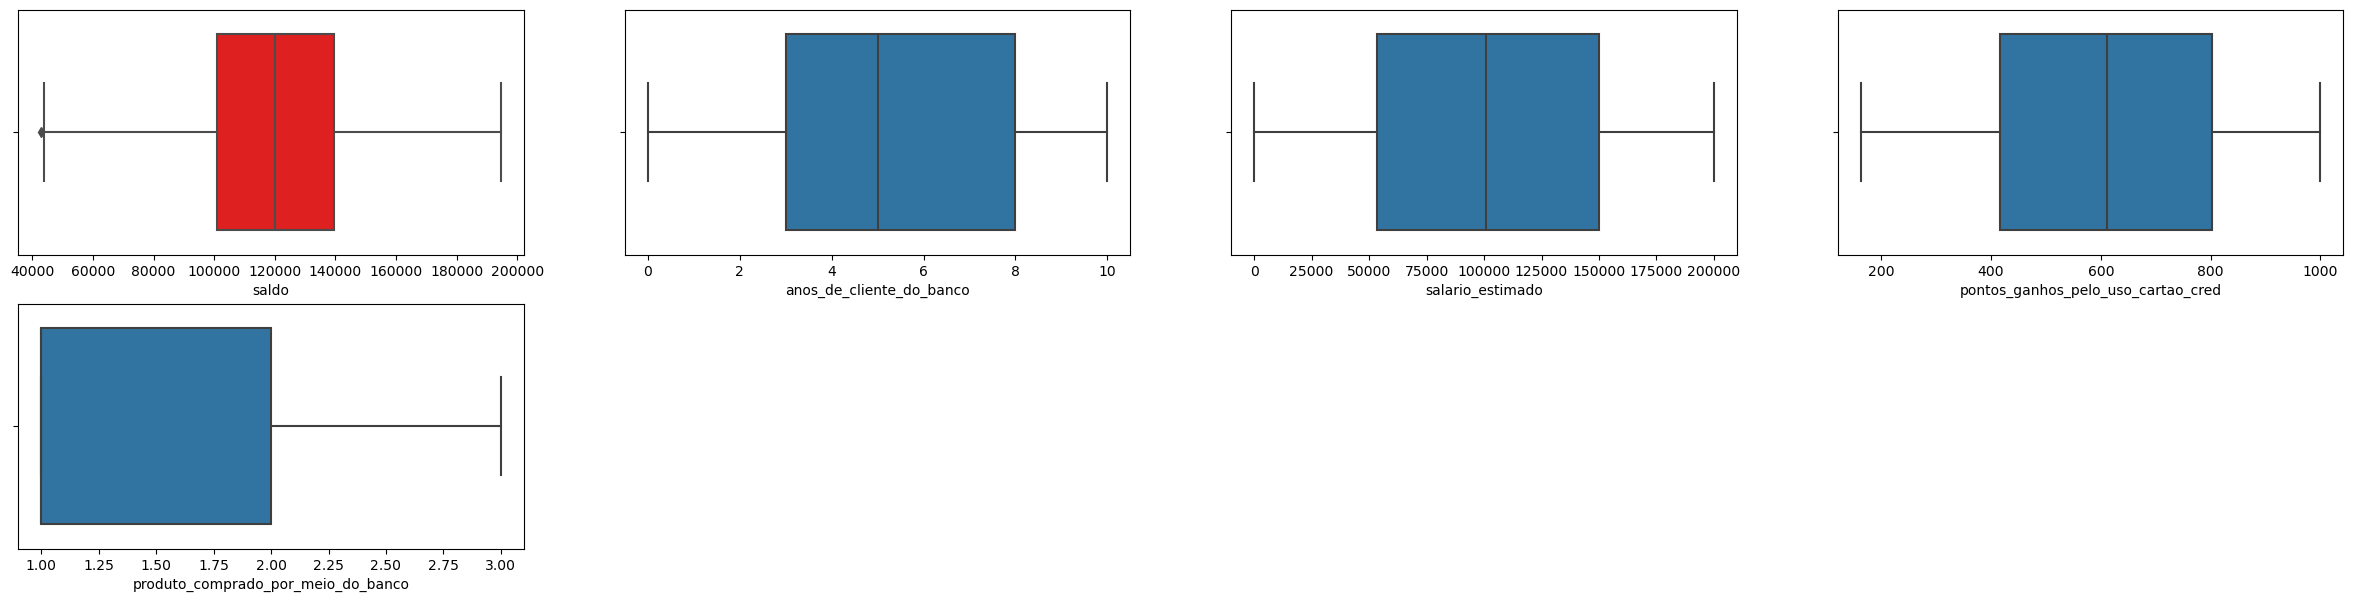

In [324]:
"""Realizando boxplot para ver se há algum outlier que possa nos atrapalhar

BOX PLOT CLIENTES OFF:"""

plt.figure(figsize=(30, 7))

plt.subplot(2, 4, 1)
sns.boxplot(x="saldo", data=clientes_off, color= "Red")

plt.subplot(2, 4, 2)
sns.boxplot(x="anos_de_cliente_do_banco", data=clientes_off)

plt.subplot(2, 4, 3)
sns.boxplot(x="salario_estimado", data=clientes_off)

plt.subplot(2, 4, 4)
sns.boxplot(x="pontos_ganhos_pelo_uso_cartao_cred", data=clientes_off)

plt.subplot(2, 4, 5)
sns.boxplot(x="produto_comprado_por_meio_do_banco", data=clientes_off)



<Axes: xlabel='saldo'>

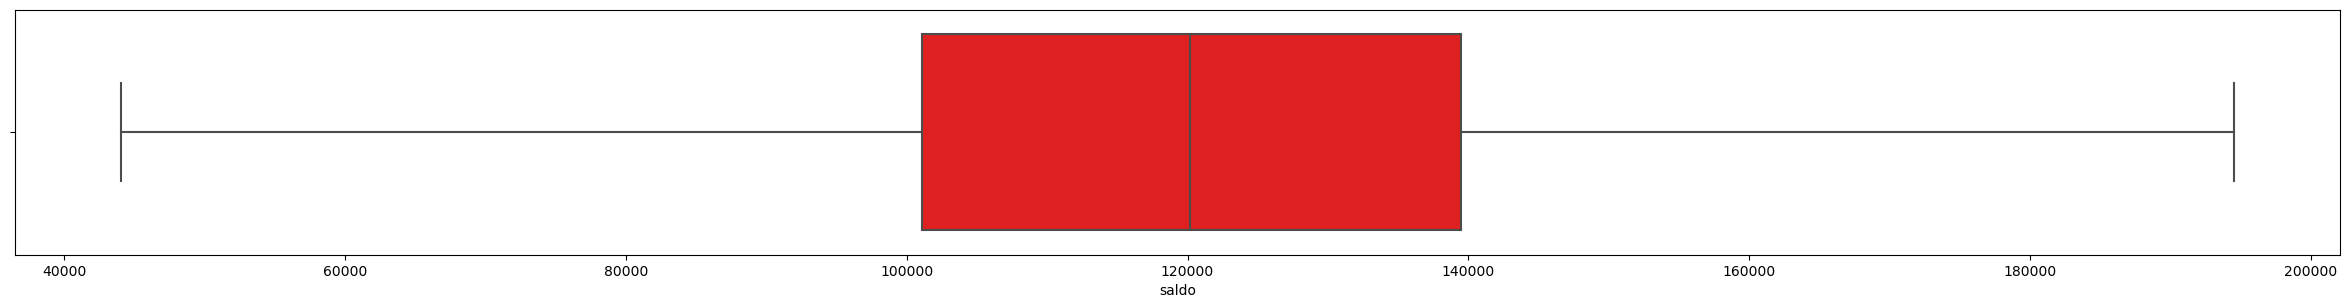

In [325]:
clientes_off2  = clientes_off.loc[(clientes_off["saldo"]<=195000) & (dados2["saldo"]>44000)]

plt.figure(figsize=(30, 7))

plt.subplot(2, 1, 1)
sns.boxplot(x="saldo", data=clientes_off2, color= "Red")


<Axes: xlabel='produto_comprado_por_meio_do_banco'>

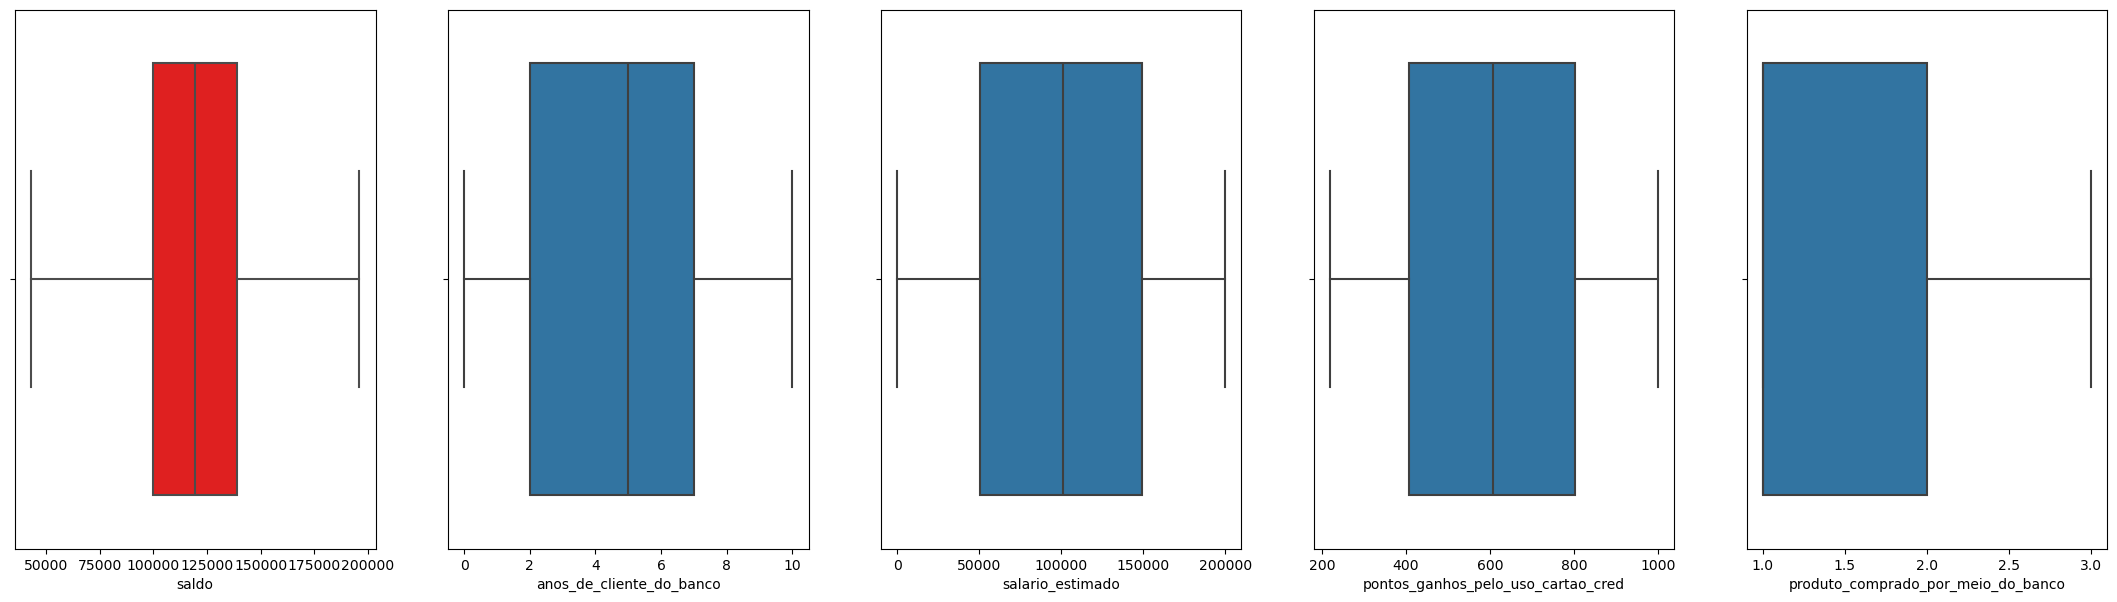

In [326]:
"""BOX PLOTS CLIENTES ON: """


plt.figure(figsize=(27, 7))

plt.subplot(1, 5, 1)
sns.boxplot(x="saldo", data=clientes_on, color= "Red")

plt.subplot(1, 5, 2)
sns.boxplot(x="anos_de_cliente_do_banco", data=clientes_on)

plt.subplot(1, 5, 3)
sns.boxplot(x="salario_estimado", data=clientes_on)

plt.subplot(1, 5, 4)
sns.boxplot(x="pontos_ganhos_pelo_uso_cartao_cred", data=clientes_on)

plt.subplot(1, 5, 5)
sns.boxplot(x="produto_comprado_por_meio_do_banco", data=clientes_on)


In [327]:
""""Há um equilibrio entre membro ativo e inativo, correto para nosso modelo trabalhar."""

dadosnum5["membro_ativo"].value_counts()

membro_ativo
1    3146
0    3020
Name: count, dtype: int64

<Axes: title={'center': 'Correlações com a coluna membros ativos'}>

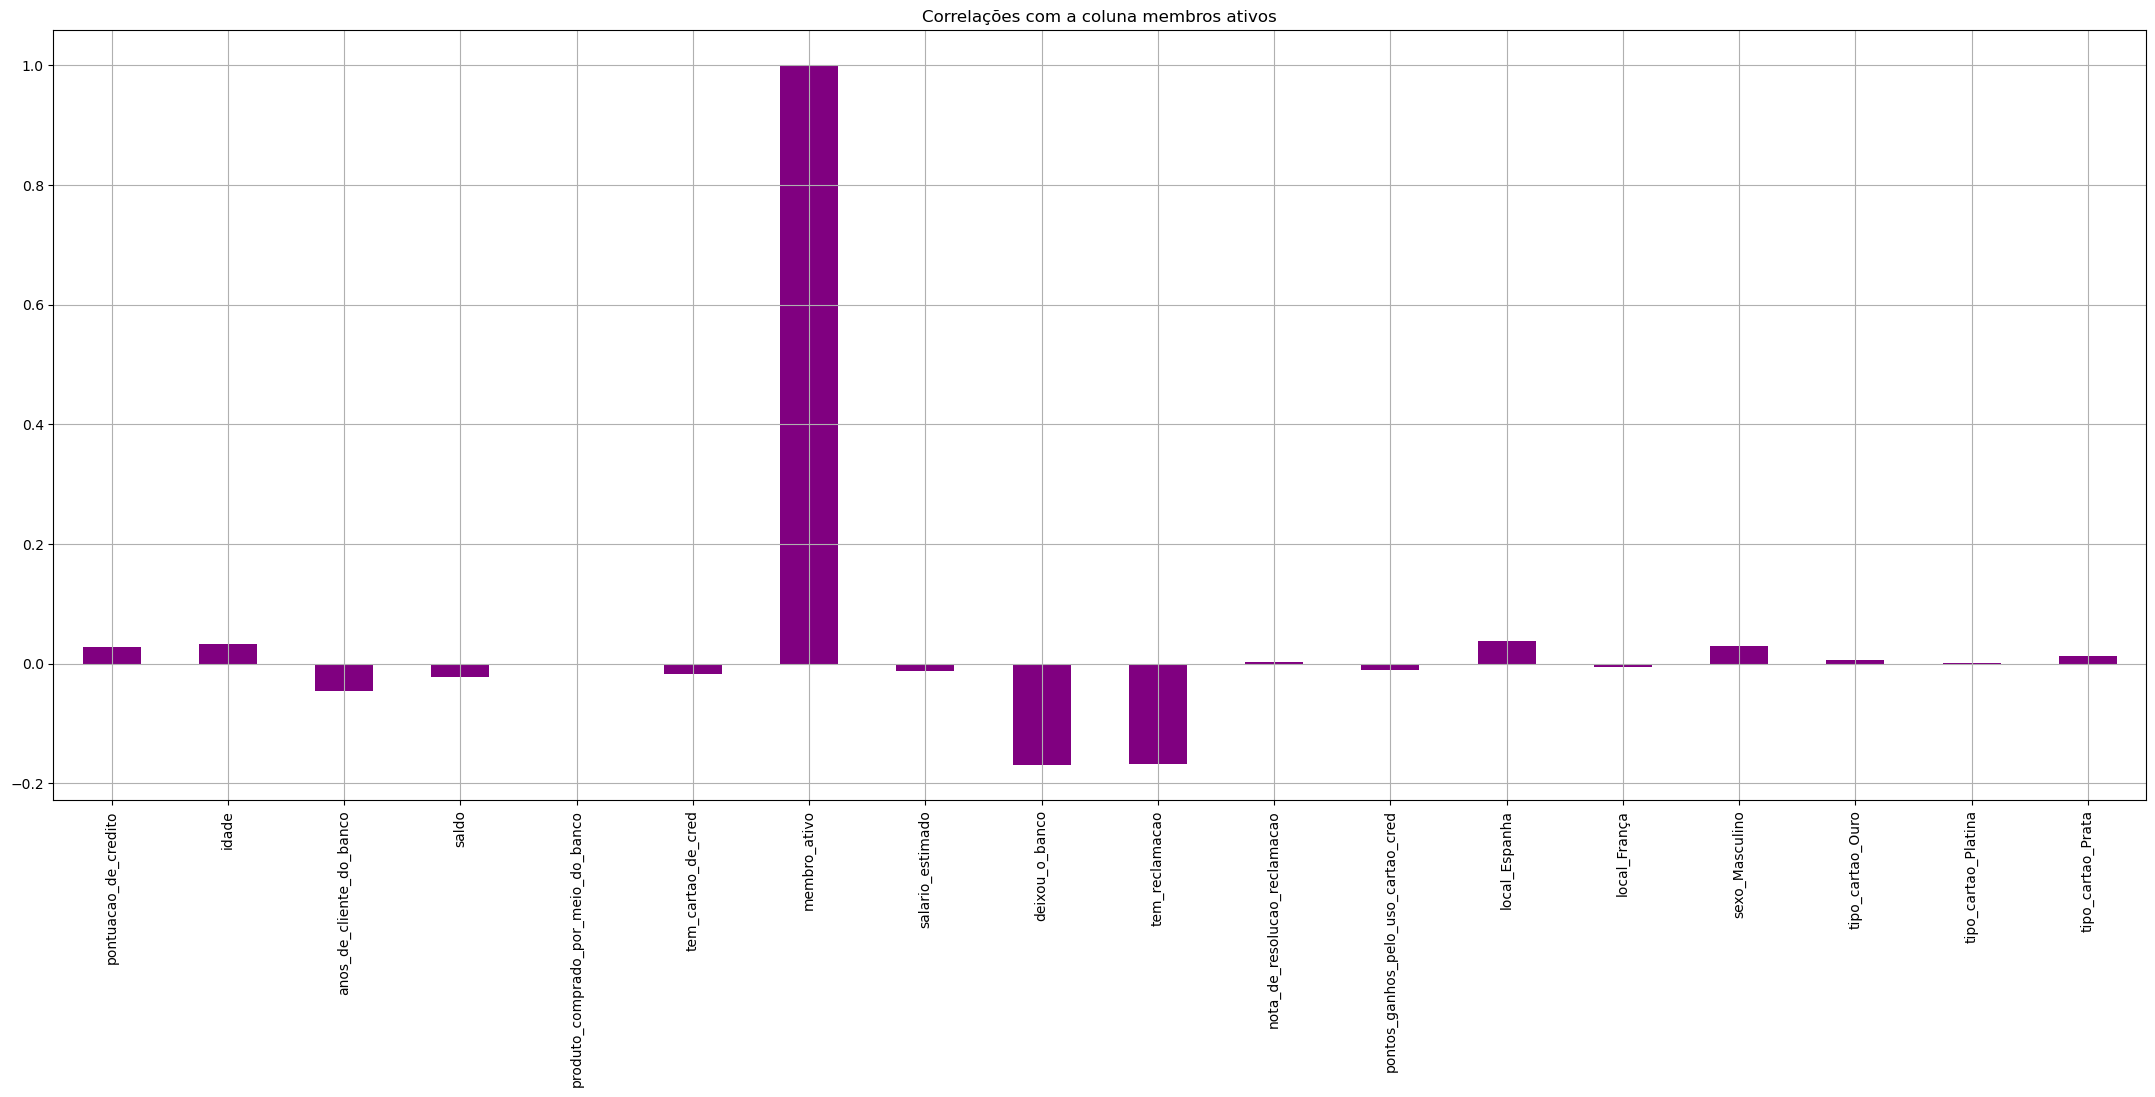

In [328]:
"""Aqui é uma correlação que nos mostra o que pode fazer um clientes ser ou não um membro ativo, falo em mais detalhe em READ_ME."""

dadosnum5.corrwith(dadosnum5["membro_ativo"]).plot.bar(
    figsize= (27,10), title="Correlações com a coluna membros ativos", color= "Purple",
    rot = 90, grid= True
)

<Axes: title={'center': 'Correlações com a coluna daqueles que deixaram o banco'}>

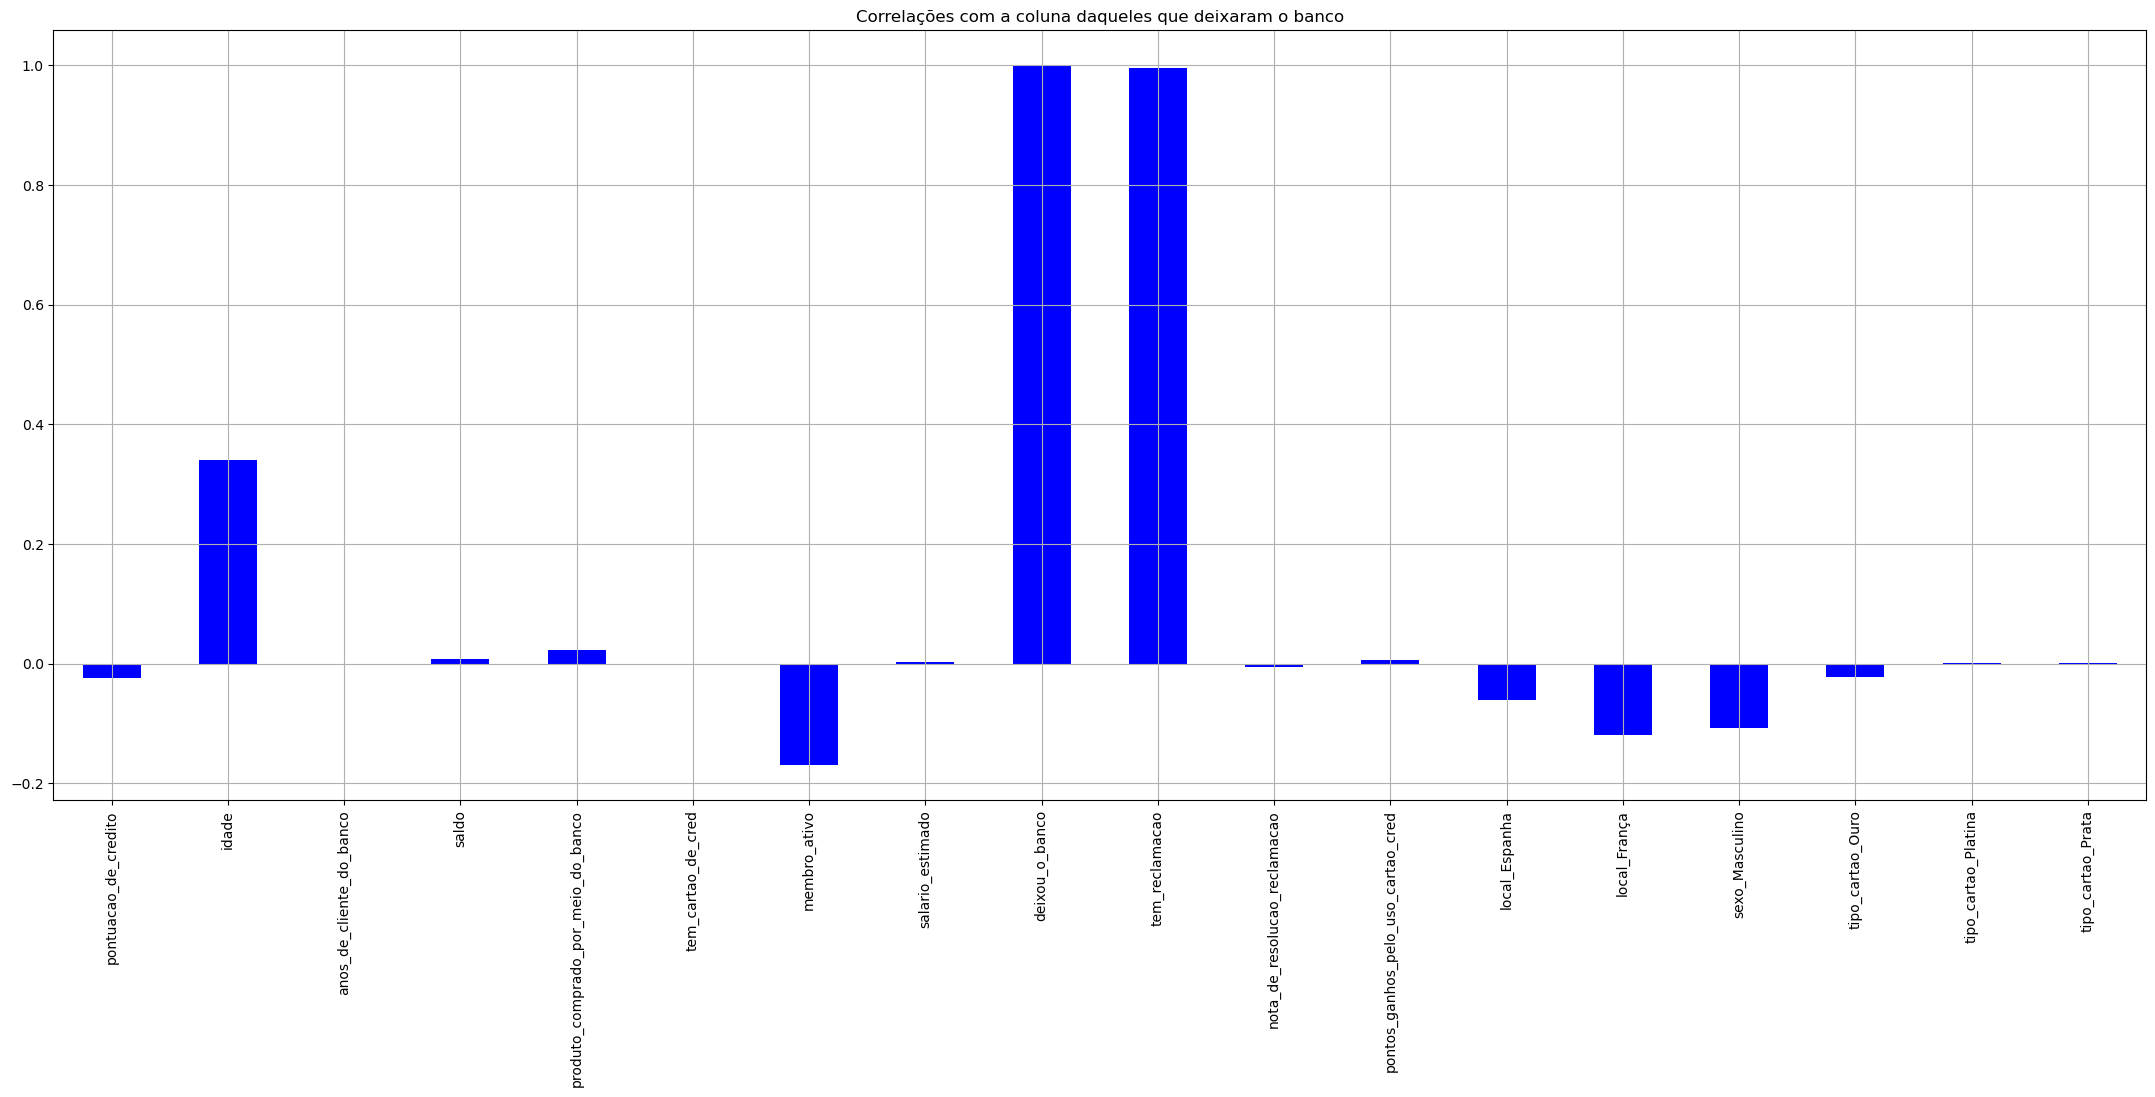

In [329]:
"""Analisando o gráfico, conseguimos concluir que a maior tendência da pessoa deixar o banco está em relação a sua idade.
Além disso, ele nos mostra que há maior capacidade de mulheres deixarem o banco. 
Para maior entendimento, vá até o meu 'READ_ME !'"""


dadosnum5.corrwith(dadosnum5["deixou_o_banco"]).plot.bar(
    figsize= (27,10), title="Correlações com a coluna daqueles que deixaram o banco", color= "Blue",
    rot = 90, grid= True
)

In [330]:
"""Depois de tudo limpo, vamos ajustar alguns valores para ficar numa escala parecida e nosso modelo não entender que um valor
é mais prioridade do que outro."""


scaler = MinMaxScaler()
dadosnum5.loc[: ,["pontuacao_de_credito", "saldo", "pontos_ganhos_pelo_uso_cartao_cred", 
                  "salario_estimado", "idade"]] = scaler.fit_transform(dadosnum5[["pontuacao_de_credito", "saldo", "pontos_ganhos_pelo_uso_cartao_cred", "salario_estimado","idade" ]])


dadosnum5.head(15)


,pontuacao_de_credito,idade,anos_de_cliente_do_banco,saldo,produto_comprado_por_meio_do_banco,tem_cartao_de_cred,membro_ativo,salario_estimado,deixou_o_banco,tem_reclamacao,nota_de_resolucao_reclamacao,pontos_ganhos_pelo_uso_cartao_cred,local_Espanha,local_França,sexo_Masculino,tipo_cartao_Ouro,tipo_cartao_Platina,tipo_cartao_Prata
1,0.478448,0.442308,1,0.266707,1,0,1,0.562770,0,1,3,0.350060,1,0,0,0,0,0
2,0.250000,0.461538,8,0.762809,3,1,0,0.569717,1,1,3,0.255675,0,1,0,0,0,0
4,1.000000,0.480769,2,0.539458,1,1,1,0.395446,0,0,5,0.313023,1,0,0,1,0,0
5,0.558190,0.500000,8,0.462576,2,1,0,0.748879,1,1,5,0.383513,1,0,1,0,0,0
8,0.247845,0.500000,4,0.647641,2,0,1,0.374722,0,0,3,0.105137,0,1,1,1,0,0
9,0.642241,0.173077,2,0.598929,1,1,1,0.358644,0,0,3,0.213859,0,1,1,1,0,0
10,0.306034,0.250000,6,0.385800,2,0,0,0.400932,0,0,3,0.120669,0,1,1,1,0,0
15,0.495690,0.519231,3,0.654691,2,0,1,0.321646,0,0,5,0.173238,0,0,1,1,0,0
16,0.575431,0.769231,1,0.585842,1,1,0,0.025435,1,0,2,0.000000,0,0,1,0,0,1
26,0.797414,0.346154,2,0.613396,1,1,1,0.850324,0,0,5,0.087216,0,0,1,0,0,0


In [340]:
"""Começando a criação do modelo"""

x = dadosnum5.drop("membro_ativo", axis= 1)
y = dadosnum5["membro_ativo"] #Separando variáveis



x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state= 42)

modelo = LogisticRegression(max_iter= 1000) 
modelo.fit(x_train,y_train)

LogisticRegression(max_iter=500)

In [341]:
"""Vendo a acuracia do modelo de diferentes formas"""

acuracia = modelo.score(x_test, y_test)
print("Nossa acurácia está em: %.3f%%" %(acuracia * 100.0))

Nossa acurácia está em: 56.865%


In [342]:
#Aplicando o classification report

y_predict = modelo.predict(x_test)



print("Classification metrics: \n", classification_report(y_test, y_predict))

"""Neste, já é nos dito que a acurácia está em 57% de formal geral, tendo uma precisão maior em 1(sim)."""

Classification metrics: 
               precision    recall  f1-score   support

           0       0.61      0.41      0.49       932
           1       0.55      0.73      0.63       918

    accuracy                           0.57      1850
   macro avg       0.58      0.57      0.56      1850
weighted avg       0.58      0.57      0.56      1850



'Neste, já é nos dito que a acurácia está em 57% de formal geral, tendo uma precisão maior em 1(sim).'

In [334]:
"""Aqui nos mostra que o modelo acertou 444 e 652 e errou 485 e 270"""

print("confusion_matrix: \n", confusion_matrix (y_test, y_predict) )

confusion_matrix: 
 [[385 547]
 [251 667]]


In [335]:
"""Agora vamos criar um modelo que possa prever quais os clientes dos dados de MEMBROS ATIVOS = SIM
tem maior probalidade de se tornar um membro negativo."""

scaler = MinMaxScaler()
clientes_on.loc[: ,["pontuacao_de_credito", "saldo", "pontos_ganhos_pelo_uso_cartao_cred", 
                  "salario_estimado", "idade"]] = scaler.fit_transform(clientes_on[["pontuacao_de_credito", "saldo", "pontos_ganhos_pelo_uso_cartao_cred", "salario_estimado","idade" ]])

clientes_on.head()

,pontuacao_de_credito,idade,anos_de_cliente_do_banco,saldo,produto_comprado_por_meio_do_banco,tem_cartao_de_cred,membro_ativo,salario_estimado,deixou_o_banco,tem_reclamacao,nota_de_resolucao_reclamacao,pontos_ganhos_pelo_uso_cartao_cred,local_Espanha,local_França,sexo_Masculino,tipo_cartao_Ouro,tipo_cartao_Platina,tipo_cartao_Prata
1,0.478448,0.442308,1,0.266198,1,0,1,0.562818,0,1,3,0.303457,1,0,0,0,0,0
4,1.000000,0.480769,2,0.539138,1,1,1,0.395480,0,0,5,0.263764,1,0,0,1,0,0
8,0.247845,0.500000,4,0.647396,2,0,1,0.374754,0,0,3,0.040973,0,1,1,1,0,0
9,0.642241,0.173077,2,0.598650,1,1,1,0.358674,0,0,3,0.157490,0,1,1,1,0,0
15,0.495690,0.519231,3,0.654452,2,0,1,0.321673,0,0,5,0.113956,0,0,1,1,0,0


In [336]:
x2 = clientes_on.drop("membro_ativo", axis= 1)
y2 = clientes_on["membro_ativo"]

previsao = modelo.predict_proba(x2)[:,1]


""" Criando um DataFrame com as probabilidades"""
df_probabilidades = pd.DataFrame({'Maior_probabilidade_de_inatividade': previsao})

"""Ordenando por probabilidade decrescente"""
df_probabilidades = df_probabilidades.sort_values('Maior_probabilidade_de_inatividade', ascending=False)

print(df_probabilidades.head(20))


#A primeira coluna representa o ID do cliente.


      Maior_probabilidade_de_inatividade
967                             0.773245
330                             0.772950
1105                            0.772822
3050                            0.768375
1755                            0.768242
1305                            0.764904
2697                            0.764146
2588                            0.763160
1389                            0.762714
502                             0.760239
228                             0.759567
2026                            0.758385
2212                            0.757172
1328                            0.756832
621                             0.755360
860                             0.755326
2880                            0.754021
1148                            0.753203
2098                            0.752924
355                             0.752428
